Implementazione di una ANN per la classificazione
dei commenti raccolti nel dataset "IMDB"

In [1]:
# importazione librerie necessarie

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
# caricamento dataset
(training_data, training_targets), (testing_data, testing_targets) = tf.keras.datasets.imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\cloud\gitlab\tradeai_v2\venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\cloud\gitlab\tradeai_v2\venv\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

In [3]:
# creazione di un unico dataset di input e di output
# per comodità di preprocessing dei dati
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [4]:
# visualizzazione statistiche sui dati
print("Classi disponibili:", np.unique(targets))
print("Numero di parole uniche:", len(np.unique(np.hstack(data))))
print('')
length = [len(i) for i in data]
print("Lunghezza media di un commento:", np.mean(length))
print("Deviazione standard sulla lunghezza media:", round(np.std(length)))
print("Lunghezza massima recensione", np.max(length))

Classi disponibili: [0 1]
Numero di parole uniche: 9998

Lunghezza media di un commento: 234.75892
Deviazione standard sulla lunghezza media: 173
Lunghezza massima recensione 2494


In [5]:
# visualizzazione del primo esempio nel dataset
print('--- primo esempio ---')
print("Label:", targets[0])
print("data:", data[0])

--- primo esempio ---
Label: 1
data: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
# costruzione di un "indice inverso" sul dataset
# per poter risalire al testo originale
index = tf.keras.datasets.imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()])
decoded = " ".join([reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
def vectorize(sequences, dimension=10000):
    # creazione di una matrice di zero
    # con numero di righe = numero di esempi passati in [sequences]
    # e numero di colonne pari a [dimension]
    results = np.zeros((len(sequences), dimension))

    # nella precedente matrice, ad ogni esempio (= ad ogni riga)
    # assegno il valore di 1 ai numeri che sono in una delle posizioni
    # presenti nella singola sequenza di posizioni presente in ogni
    # esempio
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

data = vectorize(data)
targets = np.array(targets).astype("float32")

In [8]:
model = tf.keras.models.Sequential()
# Input - Layer
model.add(layers.Dense(8, activation="relu", input_shape=(10000, )))

# Hidden - Layers
model.add(layers.Dense(4, activation="relu"))
model.add(layers.Dense(2, activation="relu"))
#model.add(layers.Dense(2, activation="relu"))

# Output- Layer
model.add(layers.Dense(1, activation="sigmoid"))

# report architettura modello
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 80,057
Trainable params: 80,057
Non-trainable params: 0
_________________________________________________________________


In [9]:
# compilazione del modello
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [10]:
# creazione dataset di addestramento
# e di validazione
train_x = data[:40000]
test_x = data[40000:]

train_y = targets[:40000]
test_y = targets[40000:]

In [11]:
# addestramento del modello
results = model.fit(
 train_x, train_y,
 epochs= 10,
 batch_size = 500,
 validation_data = (test_x, test_y)
)

Epoch 1/10
80/80 [==============================] - 4s 22ms/step - loss: 0.5164 - accuracy: 0.8124 - val_loss: 0.3632 - val_accuracy: 0.8821
Epoch 2/10
80/80 [==============================] - 1s 12ms/step - loss: 0.2892 - accuracy: 0.8989 - val_loss: 0.2693 - val_accuracy: 0.9007
Epoch 3/10
80/80 [==============================] - 1s 12ms/step - loss: 0.2202 - accuracy: 0.9208 - val_loss: 0.2540 - val_accuracy: 0.9014
Epoch 4/10
80/80 [==============================] - 1s 12ms/step - loss: 0.1880 - accuracy: 0.9322 - val_loss: 0.2569 - val_accuracy: 0.8997
Epoch 5/10
80/80 [==============================] - 1s 12ms/step - loss: 0.1680 - accuracy: 0.9396 - val_loss: 0.2671 - val_accuracy: 0.8980
Epoch 6/10
80/80 [==============================] - 1s 12ms/step - loss: 0.1522 - accuracy: 0.9463 - val_loss: 0.2809 - val_accuracy: 0.8950
Epoch 7/10
80/80 [==============================] - 1s 14ms/step - loss: 0.1414 - accuracy: 0.9504 - val_loss: 0.2985 - val_accuracy: 0.8939
Epoch 8/10
80

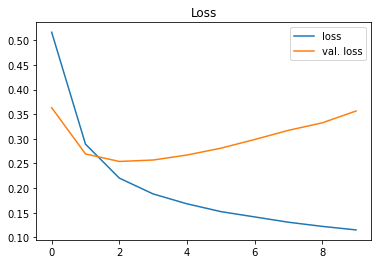

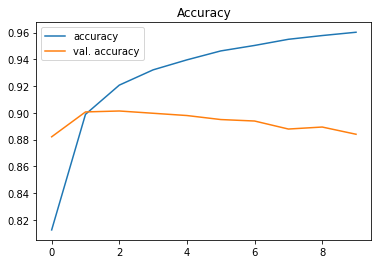

In [12]:
# grafici dell'andamento dell'addestramento

# errore
plt.title('Loss')
plt.plot(results.history['loss'], label='loss')
plt.plot(results.history['val_loss'], label='val. loss')
plt.legend()

plt.show()

# accuratezza modello
plt.title('Accuracy')
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label='val. accuracy')
plt.legend()

plt.show()

In [13]:
print('risultati sul dataset di validazione:')
print('errore medio:', results.history['val_loss'][-1])
print('accuratezza:', results.history['val_accuracy'][-1] * 100, '%')

risultati sul dataset di validazione:
errore medio: 0.3564595878124237
accuratezza: 88.40000033378601 %
